In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import Video

VIDEO_FILE = 'data/tmp/asap.mp4'
AUDIO_FILE = "data/dakha.webm"

#  Audio features

In [131]:
import librosa
import sklearn
import librosa.display

In [132]:
audio = Video.from_file(AUDIO_FILE)
audio

Video(value=b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x04B…

In [133]:
x, sr = librosa.load(AUDIO_FILE, duration=120)

## Waveplot

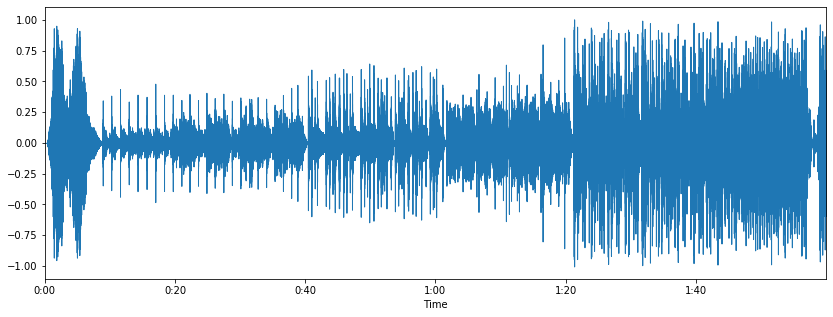

In [134]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectrogram

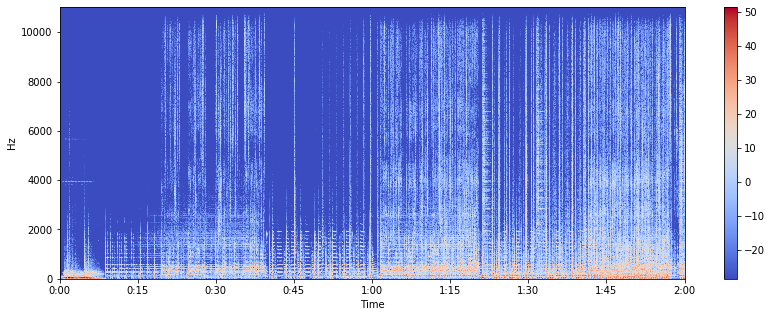

In [135]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Zoomed

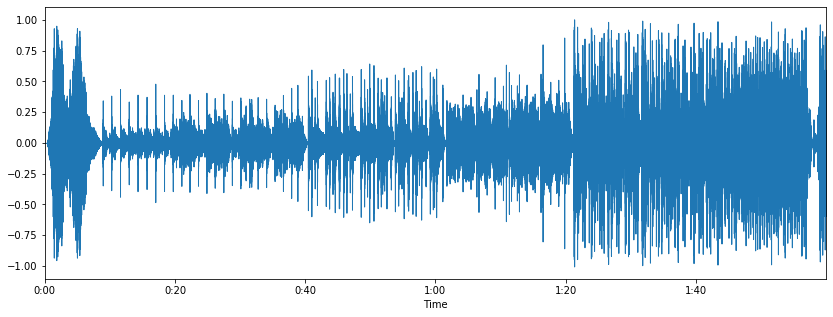

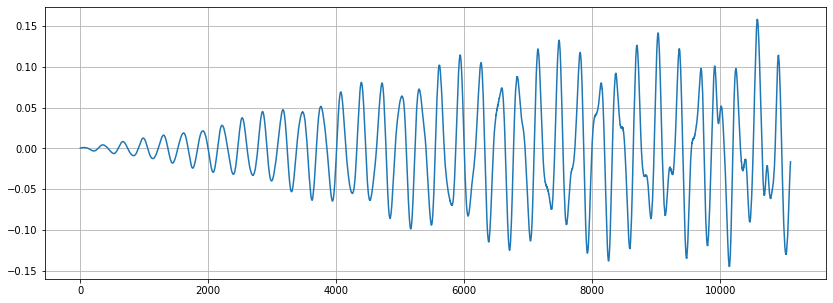

In [136]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

n0 = 8000
n1 = 19100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

### Zero crossing

In [137]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

71


### Spectral centroids

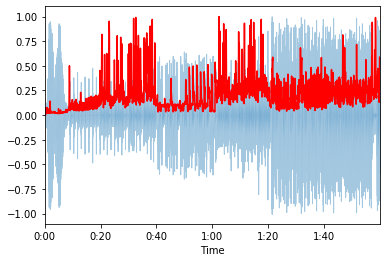

In [138]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral roloff

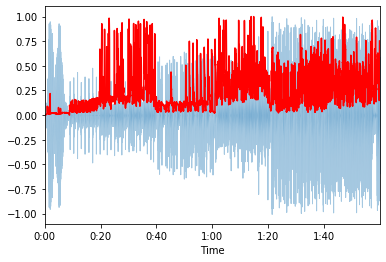

In [139]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Mel-Frequency Cepstral Coefficients

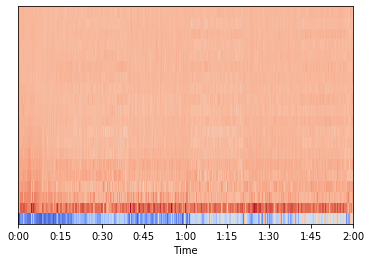

In [140]:
mfccs = librosa.feature.mfcc(x, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 1.1764075e-08  9.6880610e-09  5.8220635e-08 -3.5753560e-09
  8.0826112e-08  1.0933669e-08 -8.5318375e-09 -1.8306400e-08
  5.6802030e-10 -4.7978972e-09  4.8705576e-08  5.6283024e-08
 -5.7782366e-09  3.0586595e-08 -3.5292225e-09 -2.5050559e-08
  1.1861028e-08  4.2546738e-08  9.9071960e-09  2.7081880e-08]
[0.99999857 1.0000002  1.000002   1.0000002  0.9999969  0.99999964
 0.99999875 1.0000001  0.99999857 1.0000002  1.0000002  0.99999964
 1.         0.99999964 1.0000002  1.0000012  1.000002   0.99999875
 1.000002   0.9999992 ]


/home/atarasov/anaconda3/envs/video_edit/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/atarasov/anaconda3/envs/video_edit/lib/python3.7/site-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


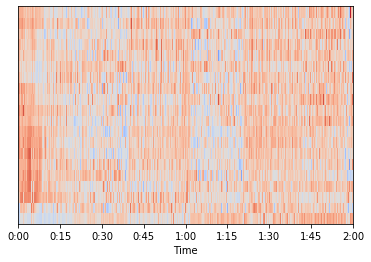

In [141]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Chroma Frequencies

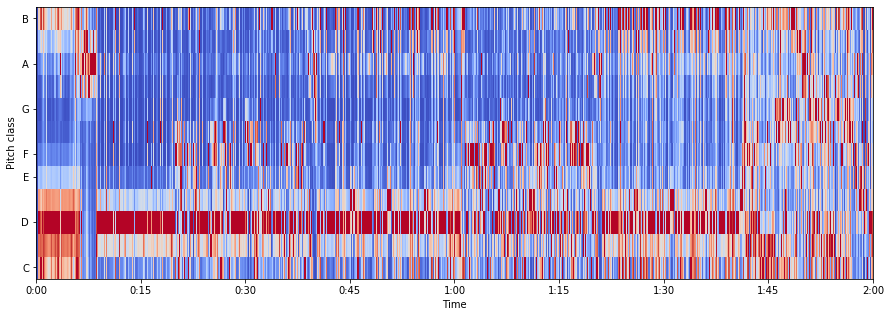

In [142]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Video features

In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [144]:
video = Video.from_file(VIDEO_FILE)
video

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\xac\x93ymdat\x00\x…

In [145]:
cap = cv2.VideoCapture(VIDEO_FILE)
ret, first_frame = cap.read()

mask = np.zeros_like(first_frame)
mask[..., 1] = 255

In [146]:
for i in range(30*25):
    ret, frame = cap.read()

### Frame

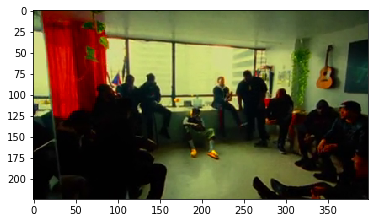

In [147]:
for i in range(10):
    ret, frame = cap.read()
    prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

colors = ("b", "g", "r")

if cap.isOpened():
    hists = []
    ret, frame = cap.read()
    chans = cv2.split(frame)
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hists.append(hist)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    prev_gray = gray
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Histogram

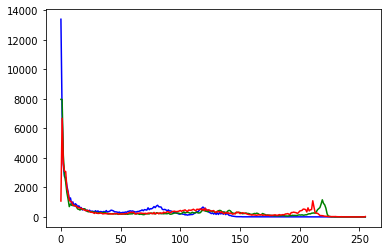

In [148]:
for color, hist in zip(colors, hists):
    plt.plot(hist, color = color)

###  Optical flow

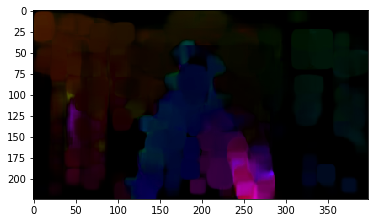

In [129]:
plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB))

# Music video model

In [109]:
from sklearn.svm import OneClassSVM
X = [[0], [0.44], [0.45], [0.46], [1]]
clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)

array([-1,  1,  1,  1, -1])

In [110]:
clf.score_samples(X)  

array([1.77987316, 2.05479873, 2.05560497, 2.05615569, 1.73328509])

In [111]:
test_X = [[0.1], [-1], [0.5], [0.2]]
clf.predict(test_X)

array([-1, -1,  1, -1])

In [113]:
clf.score_samples(test_X)

array([1.88032364, 0.44906124, 2.0558048 , 1.9600956 ])

In [114]:
video = Video.from_file("video.mp4")
video

FileNotFoundError: [Errno 2] No such file or directory: 'video.mp4'